In [1]:
import matplotlib.pyplot as plt

/home/koray/Desktop/personal-libs/usopp/.venv/lib/python3.10/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

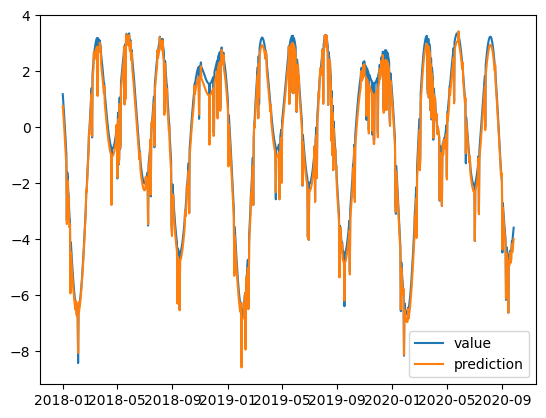

In [7]:
import numpy as np
from usopp import FourierSeasonality, LinearTrend, Regressor
from usopp.utils import multiplicative_seasonality_data

data = multiplicative_seasonality_data(
    n_components=5,
    n_features=2,
    n_changepoints=1,
)
feature_names = [f"feature{i}" for i in range(2)]
model = (
    FourierSeasonality(n=5) 
    * LinearTrend(n_changepoints=1)
    + Regressor(on=feature_names)
)
model.fit(data[["t", *feature_names]], data["value"])
res = model.predict(data[["t", *feature_names]])
plt.plot(data.t, data.value, label="value")
plt.plot(data.t, res.yhat.squeeze(), label="prediction")
plt.legend()

In [ ]:
import numpy as np
from usopp import FourierSeasonality, LinearTrend, Regressor
from usopp.utils import additive_timeseries_data

data = additive_timeseries_data(
    n_components=5,
    n_features=2,
    n_changepoints=2,
)
feature_names = [f"feature{i}" for i in range(2)]
model = (
    FourierSeasonality(n=5) 
    + LinearTrend(n_changepoints=2)
    + Regressor(on=feature_names)
)
model.fit(data[["t", *feature_names]], data["value"])
res = model.predict(data[["t", *feature_names]])
plt.plot(data.t, data.value, label="value")
plt.plot(data.t, res.yhat.squeeze(), label="prediction")
plt.legend()

In [17]:
(res.yhat.squeeze() - data.value).abs().max()

0.09046760040201285

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


/home/koray/Desktop/personal-libs/usopp/.venv/lib/python3.10/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

<Figure size 1800x100 with 0 Axes>

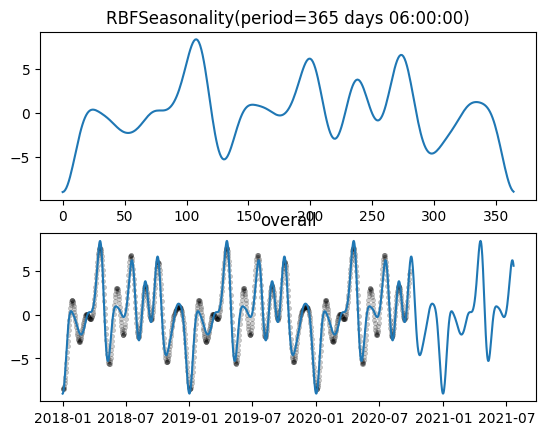

In [2]:
from usopp import RBFSeasonality
from usopp.utils import seasonal_data, MinMaxScaler
import pandas as pd

df, _ = seasonal_data(10)
from usopp.utils import get_periodic_peaks
peaks = get_periodic_peaks(20)
model = RBFSeasonality(period=pd.Timedelta(days=365.25),peaks=peaks, sigma=0.01)
model.fit(df[['t']], df['value'], y_scaler=MinMaxScaler, use_mcmc=False)
model.plot_components(X_true=df, y_true=df['value']);

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [RBFSeasonality(period=365 days 06:00:00)-beta, sigma]


/home/koray/Desktop/personal-libs/usopp/.venv/lib/python3.10/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 11 seconds.


DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10',
               ...
               '2021-07-13', '2021-07-14', '2021-07-15', '2021-07-16',
               '2021-07-17', '2021-07-18', '2021-07-19', '2021-07-20',
               '2021-07-21', '2021-07-22'],
              dtype='datetime64[ns]', length=1299, freq='D')

<Figure size 1800x100 with 0 Axes>

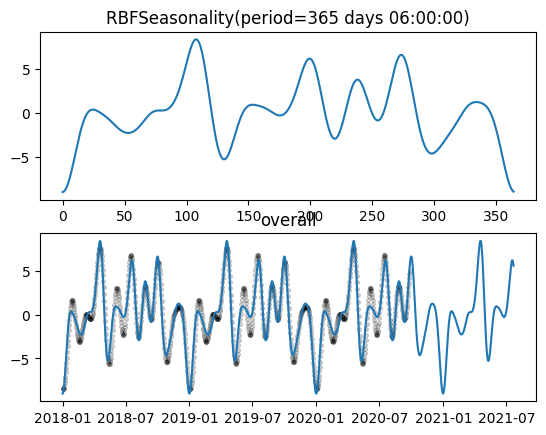

In [3]:
model.fit(df[['t']], df['value'], y_scaler=MinMaxScaler, use_mcmc=True)
model.plot_components(X_true=df, y_true=df['value'])

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [LogisticGrowth(n_changepoints=2)-delta, LogisticGrowth(n_changepoints=2)-k, LogisticGrowth(n_changepoints=2)-m, sigma]


/home/koray/Desktop/personal-libs/usopp/.venv/lib/python3.10/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 31 seconds.


<Figure size 1800x100 with 0 Axes>

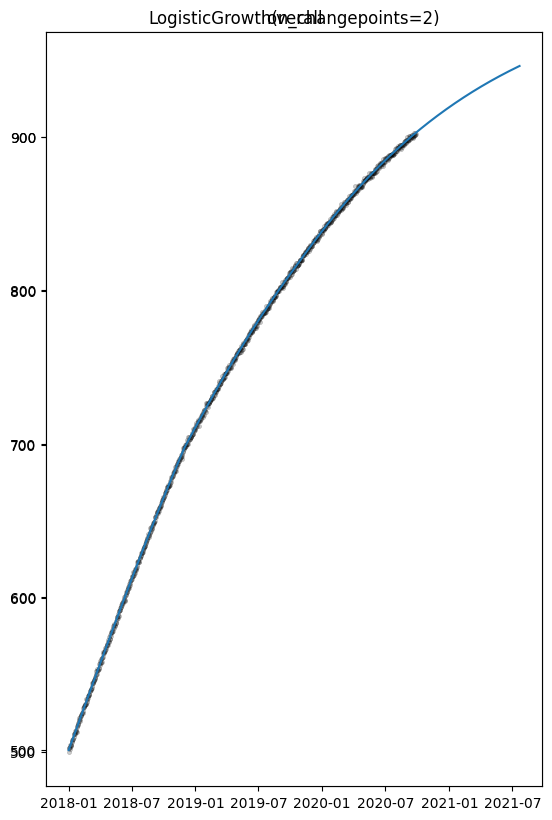

In [4]:

from usopp.logistic_growth import LogisticGrowth
from usopp.utils import logistic_growth_data
from usopp.utils import MaxScaler

df, delta = logistic_growth_data(2)
df["value"] = df["value"] * 1000
model = LogisticGrowth(capacity=1000, n_changepoints=2)
model.fit(df[["t"]], df["value"], use_mcmc=True, y_scaler=MaxScaler)
res = model.plot_components(X_true=df[["t"]], y_true=df["value"])


/home/koray/Desktop/personal-libs/usopp/.venv/lib/python3.10/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

<Figure size 1800x100 with 0 Axes>

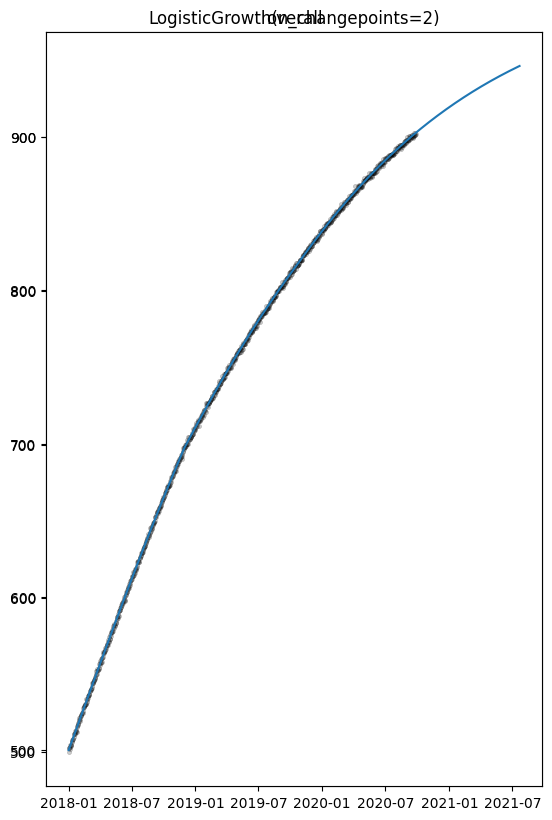

In [6]:
model.fit(df[["t"]], df["value"], use_mcmc=False, y_scaler=MaxScaler)
res = model.plot_components(X_true=df[["t"]], y_true=df["value"])

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [LinearTrend(n_changepoints=5)-delta, LinearTrend(n_changepoints=5)-k, LinearTrend(n_changepoints=5)-m, sigma]


/home/koray/Desktop/personal-libs/usopp/.venv/lib/python3.10/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 77 seconds.


DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10',
               ...
               '2021-07-13', '2021-07-14', '2021-07-15', '2021-07-16',
               '2021-07-17', '2021-07-18', '2021-07-19', '2021-07-20',
               '2021-07-21', '2021-07-22'],
              dtype='datetime64[ns]', length=1299, freq='D')

<Figure size 1800x100 with 0 Axes>

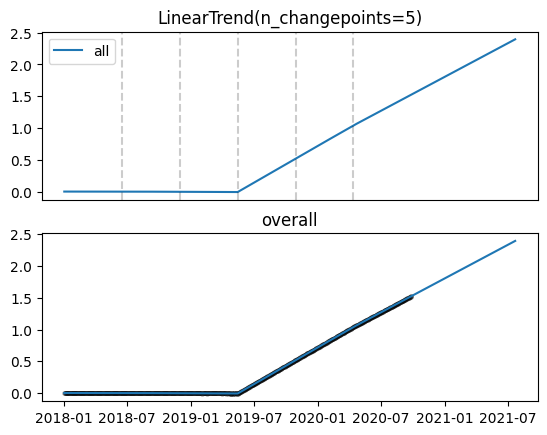

In [8]:

from usopp.linear_trend import LinearTrend
from usopp.utils import trend_data

trend, _ = trend_data(5)
model = LinearTrend(n_changepoints=5)
model.fit(trend[["t"]], trend["value"], use_mcmc=True)
model.plot_components(X_true=trend[["t"]], y_true=trend["value"])


/home/koray/Desktop/personal-libs/usopp/.venv/lib/python3.10/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10',
               ...
               '2021-07-13', '2021-07-14', '2021-07-15', '2021-07-16',
               '2021-07-17', '2021-07-18', '2021-07-19', '2021-07-20',
               '2021-07-21', '2021-07-22'],
              dtype='datetime64[ns]', length=1299, freq='D')

<Figure size 1800x100 with 0 Axes>

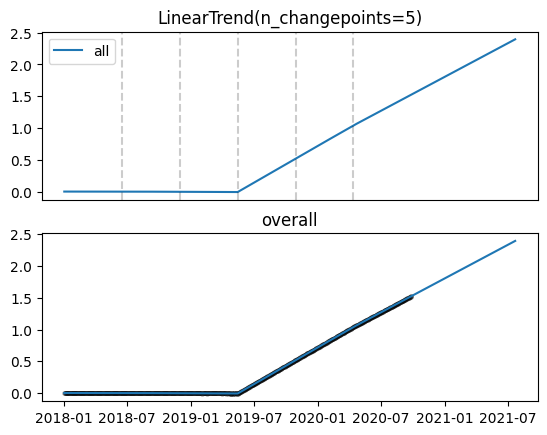

In [9]:
model.fit(trend[["t"]], trend["value"], use_mcmc=False)
model.plot_components(X_true=trend[["t"]], y_true=trend["value"])

/home/koray/Desktop/personal-libs/usopp/.venv/lib/python3.10/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10',
               ...
               '2021-07-13', '2021-07-14', '2021-07-15', '2021-07-16',
               '2021-07-17', '2021-07-18', '2021-07-19', '2021-07-20',
               '2021-07-21', '2021-07-22'],
              dtype='datetime64[ns]', length=1299, freq='D')

<Figure size 1800x100 with 0 Axes>

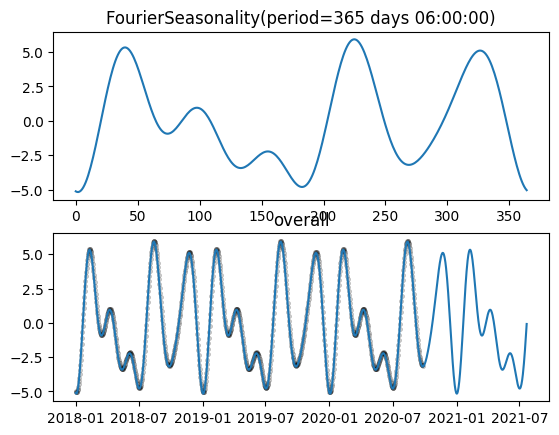

In [11]:
from usopp.fourier_seasonality import FourierSeasonality
from usopp.utils import seasonal_data, trend_data

df, beta = seasonal_data(6)

model = FourierSeasonality(n=6)
model.fit(df[["t"]], df["value"], use_mcmc=False)
model.plot_components(X_true=df[["t"]], y_true=df["value"])

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [FourierSeasonality(period=365 days 06:00:00)-beta, sigma]


/home/koray/Desktop/personal-libs/usopp/.venv/lib/python3.10/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 6 seconds.


DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10',
               ...
               '2021-07-13', '2021-07-14', '2021-07-15', '2021-07-16',
               '2021-07-17', '2021-07-18', '2021-07-19', '2021-07-20',
               '2021-07-21', '2021-07-22'],
              dtype='datetime64[ns]', length=1299, freq='D')

<Figure size 1800x100 with 0 Axes>

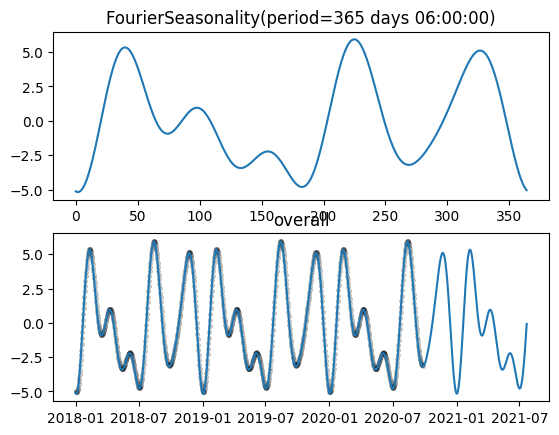

In [12]:
model.fit(df[["t"]], df["value"], use_mcmc=True)
model.plot_components(X_true=df[["t"]], y_true=df["value"])